In [1]:
from numpy.random import randint, choice
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from time import time

In [7]:
vector = np.array([1, 1, 0, 1])
vector[[1, 2, 3]]
lista = [1, 1, 0, 1]
lista[[1, 2, 3]]

TypeError: list indices must be integers or slices, not list

In [18]:
class cheapPriorityQueue(object):
    def __init__(self, max_size=100000, alpha=0.7, beta=0.5):
        self.len = max_size
        self.payloads = [None for _ in range(max_size)]
        self.weights = np.zeros(max_size)
        self.alpha = alpha
        self.beta = beta
        
    def _calcImportance(self, val):
        """Adjust the weights so that in the long run they do not skew the model distribution.
        
        Using the adjustment found in https://arxiv.org/abs/1511.05952v4
        That is, w_{i} = \left(\frac{1}{N}\cdot\frac{1}{P\left(i\right)}\right)^{\beta} 
        """
        if val is None:
            return 1000
        epsilon = 0.0001
        beta_rate = 1.000001
        adj_pi = (np.abs(val) + epsilon) ** self.alpha
        total_pi = np.sum(self.weights) + epsilon
        imp_sampled_pi = (total_pi / ((self.len + 1) * adj_pi)) ** self.beta
        # beta = 0.5 maxes out at 1 after around 100.000 cicles with a beta rate of 1.000001
        # maxing out is bad (infinite recursion)
        self.beta = min(self.beta*beta_rate, 0.999)
        return imp_sampled_pi*adj_pi
    
    def insert(self, val, payload):
        pos = randint(0, self.len-1)
        priority = self._calcImportance(val)
        self.weights[pos] = priority
        self.payloads[pos] = payload
        self.weights /= np.sum(self.weights)
        
    def sample(self, size):
        sample = choice(self.payloads, size, p=self.weights)
        return sample
        

PriorityReplay was created in 0.006056308746337891 seconds.
100000 elements were inserted in 16.472843408584595 seconds.
A sample of 100000 was generated in 0.028467178344726562 seconds.


<AxesSubplot:ylabel='Count'>

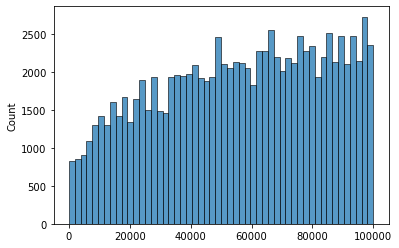

In [57]:
sample_size = 100000
start = time()
prior = cheapPriorityQueue(max_size=sample_size)
structure_elapsed = time()
for i in range(sample_size):
    val = randint(1, sample_size)
    prior.insert(val=val/(sample_size), payload=val)
buffer_elapsed = time()
sample_start = time()
sample = prior.sample(sample_size)
sample_end = time()

print(f"PriorityReplay was created in {structure_elapsed - start} seconds.")
print(f"{sample_size} elements were inserted in {buffer_elapsed - structure_elapsed} seconds.")
print(f"A sample of {sample_size} was generated in {sample_end - sample_start} seconds.")

sns.histplot(sorted(sample))

In [68]:
%timeit prior.sample(100000)

26.1 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
insert_times = []
sample_times = []

for size in range(10000, 20001, 100):
    print(f"testing size {size}...")
    prior2 = cheapPriorityQueue(max_size=size)
    insert_start = time()
    for i in range(size):
        val = randint(1, size)
        prior2.insert(val=val, payload=val)
    insert_end = time()
    sample = prior2.sample(size)
    sample_end = time()
    insert_times.append(insert_end - insert_start)
    sample_times.append(sample_end - insert_end)

testing size 10000...
testing size 10100...
testing size 10200...
testing size 10300...
testing size 10400...
testing size 10500...
testing size 10600...
testing size 10700...
testing size 10800...
testing size 10900...
testing size 11000...
testing size 11100...
testing size 11200...
testing size 11300...
testing size 11400...
testing size 11500...
testing size 11600...
testing size 11700...
testing size 11800...
testing size 11900...
testing size 12000...
testing size 12100...
testing size 12200...
testing size 12300...
testing size 12400...
testing size 12500...
testing size 12600...
testing size 12700...
testing size 12800...
testing size 12900...
testing size 13000...
testing size 13100...
testing size 13200...
testing size 13300...
testing size 13400...
testing size 13500...
testing size 13600...
testing size 13700...
testing size 13800...
testing size 13900...
testing size 14000...
testing size 14100...
testing size 14200...
testing size 14300...
testing size 14400...
testing si

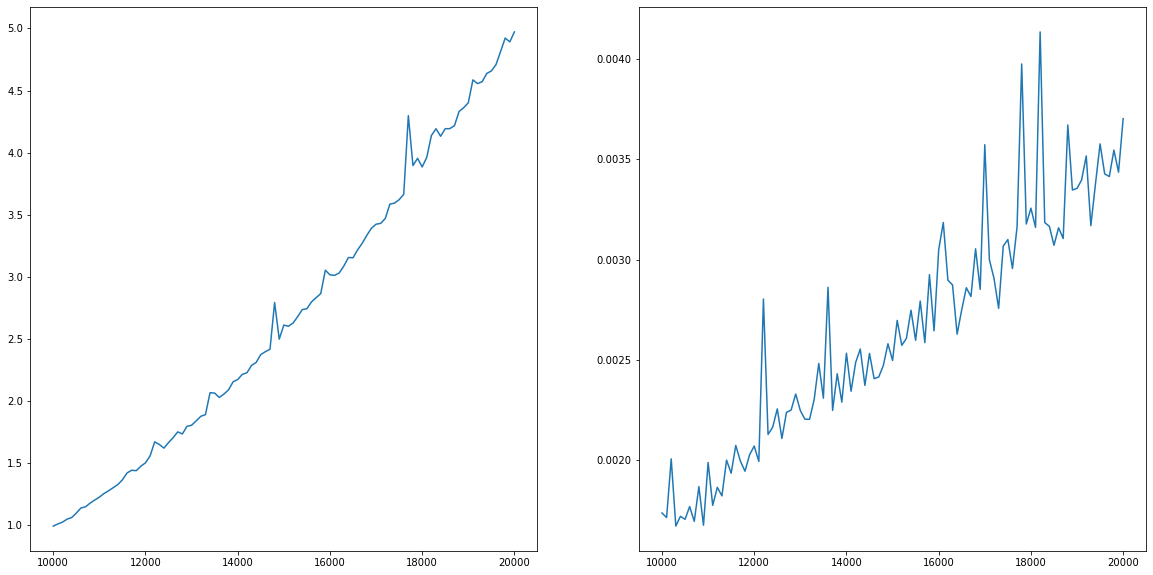

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.lineplot(x=list(range(10000, 20001, 100)), y=insert_times, ax=ax[0])
sns.lineplot(x=list(range(10000, 20001, 100)), y=sample_times, ax=ax[1])
plt.show()

In [40]:
print(insert_times)
print(sample_times)

[0, 0.9907848834991455, 2.642521619796753, 5.177090644836426, 8.345187902450562, 12.766213178634644, 17.253820180892944, 23.67641282081604, 29.58339238166809, 37.283881425857544, 48.260929346084595, 59.754979848861694, 68.52712941169739, 78.62782979011536, 92.5649983882904, 111.81274676322937, 125.45539569854736, 138.8317174911499, 151.08583235740662, 157.26471590995789]
[0.002026796340942383, 0.0029578208923339844, 0.003572702407836914, 0.004646778106689453, 0.005942106246948242, 0.007154226303100586, 0.008122682571411133, 0.008791685104370117, 0.009995460510253906, 0.022092103958129883, 0.013425827026367188, 0.014241456985473633, 0.017594575881958008, 0.01942753791809082, 0.019170761108398438, 0.02253556251525879, 0.021554946899414062, 0.02247452735900879, 0.024545669555664062]


<AxesSubplot:>

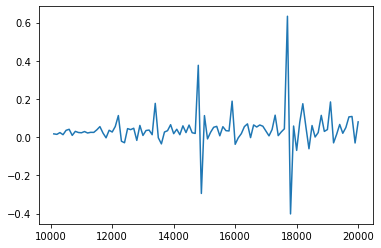

In [48]:
insert_times.insert(0, 0)
insert_time_diff = [insert_times[i] - insert_times[i-1] for i in range(1, len(insert_times))]
sns.lineplot(x=list(range(10100, 20001, 100)), y=insert_time_diff)

In [50]:
np.mean(insert_time_diff[1:])

0.03979960441589356

<AxesSubplot:>

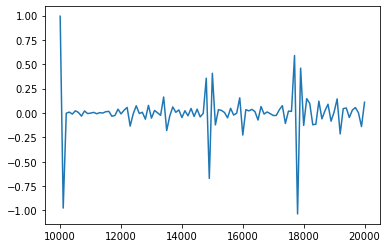

In [45]:
insert_time_diff.insert(0,0)
insert_time_diff_2 = [insert_time_diff[i] - insert_time_diff[i-1] for i in range(1, len(insert_time_diff))]
sns.lineplot(x=list(range(10000, 20001, 100)), y=insert_time_diff_2)

In [51]:
np.mean(insert_time_diff_2)

0.0007921941209547591

<AxesSubplot:>

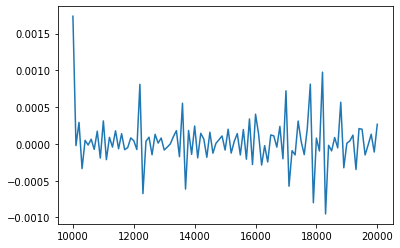

In [47]:
sample_times.insert(0, 0)
sample_time_diff = [sample_times[i] - sample_times[i-1] for i in range(1, len(sample_times))]
sns.lineplot(x=list(range(10000, 20001, 100)), y=sample_time_diff)

In [52]:
np.mean(sample_time_diff)

3.6669249581818534e-05